<center> <font size=6>Data manipulation</font></center>

# 1. Introduction à `pandas`
## 1.1 `Series` et `DataFrame`

`pandas` est un paquet qui traite des données, à la frontière entre `numpy` et les bases de données. Voici une courte introduction à l'utilisation de ce package très utilisé.
Deux objets principaux sont proposés pour stocker les données en mémoire dans `pandas` : `Series` et `DataFrame`.
- La série traite des données à une colonne.
- Les `DataFrame` traitent des données sur plusieurs colonnes. Nous nous concentrerons sur les `DataFrame`s dans la suite de ce projet
L'objet `DataFrame` est composé de trois parties principales :
les données, qui peuvent être de types numériques, date ou chaînes de caractères. Les données sont organisées en colonnes, qui ont le même type. Cependant, les différentes colonnes peuvent avoir des types différents.
- un index de ligne, qui peut être utilisé pour accéder aux lignes par nom. Par défaut, l'indice est constitué d'entiers consécutifs à partir de `0`.
- les noms de colonnes, qui permettent d'accéder aux colonnes par noms.

Voici comment créer un `DataFrame` : Le constructeur de `DataFrame` attend au moins un dictionnaire contenant les noms des colonnes comme clés et les valeurs de type `list` ou 1D `numpy.ndarray`. Vous pouvez aussi spécifier le paramètre `index`, qui est également une colonne de données. Par défaut, l'index est créé sous forme d'entiers consécutifs.

Les méthodes `head()`et `tail()` renvoient les premières / dernières lignes du `DataFrame` avec les noms des colonnes, ce qui est très utile pour le débogage.

Utilisez l'exemple ci-dessous pour tester la création d'une `DataFrame` en ajoutant ou supprimant des colonnes, en supprimant le paramètre `index`, ....

In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np

t_min, t_max, N = 0, 10, 51
t = np.linspace(t_min, t_max, N)

V = np.sin(t) + 0.1*np.random.rand(N) - 0.05
I = 10*np.cos(t) + 0.6*np.random.rand(N) - 0.3
error1 = np.zeros(N)+0.1
error2 = np.zeros(N)+0.6

data = df({"Voltage" : V, "Intensity" : I, "error_V" : error1, "error_I" : error2}, index=t)
print(data.head())

      Voltage  Intensity  error_V  error_I
0.0  0.008443  10.276172      0.1      0.6
0.2  0.237216   9.816339      0.1      0.6
0.4  0.439162   9.139810      0.1      0.6
0.6  0.565988   8.330356      0.1      0.6
0.8  0.721598   6.880112      0.1      0.6


La méthode `describe()` permet d'obtenir des informations statistiques sur l'ensemble de la `DataFrame`:

In [2]:
data.describe()

,Intensity,Voltage,error_I,error_V
count,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,-0.487544,0.176952,6.000000e-01,1.000000e-01
std,7.302658,0.673570,5.606351e-16,4.204764e-17
min,-10.145064,-1.040630,6.000000e-01,1.000000e-01
25%,-7.891813,-0.418319,6.000000e-01,1.000000e-01
50%,-1.051037,0.306895,6.000000e-01,1.000000e-01
75%,6.609282,0.822096,6.000000e-01,1.000000e-01
max,10.111801,1.027872,6.000000e-01,1.000000e-01


Pour sauvegarder les données du `Dataframe` dans un fichier, il suffit d'utiliser la méthode correspondante :
- `to_csv()` pour sauvegarder avec un format de variable séparée par des virgules.
- `to_excel()` pour sauvegarder sous forme de feuille de calcul Microsoft Excel.
- `to_hdf()` pour le format HDF5.

De nombreux autres formats sont disponibles tels que HTML, JSON, SQL, ....

Pour lire les données d'un fichier, un appel à `read_XXX()` créera un objet `DataFrame` (XXX correspond à csv, excel, ....). Assurez-vous de spécifier le paramètre `index_col` avec l'entier de la colonne contenant l'index ou `pandas` créera une colonne d'index supplémentaire.

In [4]:
# écriture d'un fichier au format csv
data.to_csv("elec.csv")
#data.to_excel("elec.xlsx")
# lecture d'un fichier
csv_data = pd.read_csv("elec.csv")#, index_col=0)
print(csv_data.head())

   Unnamed: 0   Voltage  Intensity  error_V  error_I
0         0.0 -0.025521  10.210887      0.1      0.6
1         0.2  0.246308   9.854295      0.1      0.6
2         0.4  0.385220   9.319530      0.1      0.6
3         0.6  0.582456   7.993808      0.1      0.6
4         0.8  0.686150   6.946054      0.1      0.6


## Autre exemple

In [20]:
import pandas as pd

# Création d'un dictionnaire avec des données
data = {
    'Nom': ['Alice', 'Bob', 'Claire', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'Ville': ['Paris', 'Lyon', 'Marseille', 'Toulouse', 'Nice'],
    'Score': [85.5, 90.3, 78.0, 92.1, 88.7]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Définir l'age comme index
df.set_index('Age', inplace=True)

# Trier le DataFrame par index
df.sort_index(inplace=True)

# Affichage du DataFrame
print(df)

print(20*'-')
print('index values')
print(df.index.values)

#print(20*'-')
# Sélectionner les lignes avec les âges entre 22 et 24 inclusivement
#print(df.loc[22:24])


        Nom      Ville  Score
Age                          
22   Claire  Marseille   78.0
24    Alice      Paris   85.5
27      Bob       Lyon   90.3
29      Eva       Nice   88.7
32    David   Toulouse   92.1
--------------------
index values
[22 24 27 29 32]


## 1.2 Extraire des données d'une `Dataframe`

Pandas est une excellente bibliothèque pour l'indexation et la manipulation des données (agrégation, tableaux croisés, filtrage, ...).

Dans cet exemple, nous lisons un fichier csv depuis une url. Ce fichier contient des informations sur les prix Nobel. Quelques méthodes pour rechercher des informations spécifiques dans le `DataFrame` sont données. Des informations plus complètes peuvent être trouvées sur le site de la documentation officielle de `pandas` : http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [2]:
import io
import requests
url = "https://authors.library.caltech.edu/74170/2/nobel_prize.csv"
df_nobel = pd.read_csv(url)
df_nobel.tail(3)

,id,firstname,surname,born,died,BornCountry,bornCountryCode,BornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,institution,city,country
586,931,Jean-Pierre,Sauvage,10/21/1944,0000-00-00,France,FR,Paris,NaN,NaN,NaN,male,2016,chemistry,3,"""for the design and synthesis of molecular mac...",University of Strasbourg,Strasbourg,France
587,932,Sir J. Fraser,Stoddart,5/24/1942,0000-00-00,United Kingdom,GB,Edinburgh,NaN,NaN,NaN,male,2016,chemistry,3,"""for the design and synthesis of molecular mac...",Northwestern University,"Evanston, IL",USA
588,933,Bernard L.,Feringa,5/18/1951,0000-00-00,the Netherlands,NL,Barger-Compascuum,NaN,NaN,NaN,male,2016,chemistry,3,"""for the design and synthesis of molecular mac...",University of Groningen,Groningen,the Netherlands


Pour extraire une colonne donnée (Par exemple les noms des Nobels), on peut utiliser l'opérateur []. On peut aussi utiliser le nom de colonne comme attribut, ce qui permet de bénéficier de la complétion automatique !

Il est également possible d'extraire un ensemble de colonnes spécifique en utilisant une `list` comme paramètre.

L'index est géré différemment des autres colonnes. Pour accéder à la colonne correspondante, il faut utiliser la propriété `index.values`, qui retourne une `list`

In [4]:
# Extraction d'une colonne
names = df_nobel["surname"] # crée une pandas.Series
names = df_nobel.surname    # méthode alternative
print(names)
print("--------------")
print(df_nobel.columns)

# Exctaction de plusieurs colonnes
names = df_nobel[["firstname", "surname"]] # crée une pandas.DataFrame
print(names)
print("--------------")

# extraction de l'index
print(df_nobel.index.values)

0         Röntgen
1         Lorentz
2          Zeeman
3       Becquerel
4           Curie
          ...    
584       Haldane
585    Kosterlitz
586       Sauvage
587      Stoddart
588       Feringa
Name: surname, Length: 589, dtype: object
--------------
Index(['id', 'firstname', 'surname', 'born', 'died', 'BornCountry',
       'bornCountryCode', 'BornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'share', 'motivation',
       'institution', 'city', 'country'],
      dtype='object')
          firstname     surname
0    Wilhelm Conrad     Röntgen
1    Hendrik Antoon     Lorentz
2            Pieter      Zeeman
3     Antoine Henri   Becquerel
4            Pierre       Curie
..              ...         ...
584    F. Duncan M.     Haldane
585      J. Michael  Kosterlitz
586     Jean-Pierre     Sauvage
587   Sir J. Fraser    Stoddart
588      Bernard L.     Feringa

[589 rows x 2 columns]
--------------
[  0   1   2   3   4   5   6   7   8   9  10  

Pour extraire une ligne spécifique, ou un intervalle de lignes spécifique, on peut utiliser les fonctions `loc[]` et `iloc[]`. Attention, ces fonctions travaillent avec l'opérateur []. Elles peuvent être utilisées avec un argument de type `list` ou avec une tranche (slice) dont la syntaxe est identique à celle utilisée avec `numpy`.
- `loc[]` utilise les noms de ligne (l'index). Notez que si une slice est fournie en argument, le second élément de la tranche est inclus, contrairement au comportement de `numpy`.
- `iloc[]` utilise des entiers correspondant aux numéros de ligne concernés

In [8]:
# Extraction des lignes 500 et 505 de la liste des prix Nobels
extr1 = df_nobel.loc[[500,505]]  # retourne une DataFrame contenant 2 lignes
print(extr1)

# Extraction des lignes 2 et 3.2 
extr2 = data.loc[[2,3.2]]
#print(extr2)

# Extraction des lignes 2 à 3.2 inclus
extr3 = data.loc[2 : 3.2]  
#print(extr3)

      id   firstname surname        born        died BornCountry  \
500  781       Irwin    Rose   7/16/1926    6/3/2015         USA   
505  793  Theodor W.  Hänsch  10/30/1941  0000-00-00     Germany   

    bornCountryCode      BornCity diedCountry diedCountryCode       diedCity  \
500              US  Brooklyn, NY         USA              US  Deerfield, MA   
505              DE    Heidelberg         NaN             NaN            NaN   

    gender  year   category  share  \
500   male  2004  chemistry      3   
505   male  2005    physics      4   

                                            motivation  \
500  "for the discovery of ubiquitin-mediated prote...   
505  "for their contributions to the development of...   

                         institution        city  country  
500         University of California  Irvine, CA      USA  
505  Ludwig-Maximilians- Universität      Munich  Germany  


Extraire des lignes contenant un index de type réel peut être difficile (par exemple, dans la cellule ci-dessus, il faut utiliser 2 et non 2.0 comme valeur de l'index). Heureusement, la méthode d'accès aux lignes `iloc[]` permet de s'affranchir de ce problème. En passant par `iloc[]`, on utilise comme argument un entier correspondant au numéro de la ligne.

Dans la cellule ci-dessous, utilisez `iloc[]` pour obtenir le même résultat que ce qui avait été fait avec `loc[]` au dessus. Attention, avec `iloc[]`, le second argument de la tranche n'est pas inclus (comme avec la syntaxe `numpy`, mais contrairement à la syntaxe de `loc[]`).

In [11]:
# Extraction des lignes 500 et 505 de la liste des prix Nobels
extr4 =  # à remplir
print(extr4)

# Extraction des lignes 2 et 3.2 
#extr5 = # à remplir
#print(extr5)

# Extraction des lignes 2 à 3.2 inclus
#extr6 = # à remplir
#print(extr6)

   id       firstname  surname        born       died            BornCountry  \
0   1  Wilhelm Conrad  Röntgen  1845-03-27  2/10/1923  Prussia (now Germany)   
1   2  Hendrik Antoon  Lorentz  1853-07-18   2/4/1928        the Netherlands   

  bornCountryCode                BornCity      diedCountry diedCountryCode  \
0              DE  Lennep (now Remscheid)          Germany              DE   
1              NL                  Arnhem  the Netherlands              NL   

  diedCity gender  year category  share  \
0   Munich   male  1901  physics      1   
1      NaN   male  1902  physics      2   

                                          motivation        institution  \
0  "in recognition of the extraordinary services ...  Munich University   
1  "in recognition of the extraordinary service t...  Leiden University   

     city          country  
0  Munich          Germany  
1  Leiden  the Netherlands  


Pour finir sur l'extraction d'une partie de la `DataFrame`, notons qu'il est possible d'extraire un sous-ensemble de lignes et de colonnes :
- soit en combinant les méthodes montrées précédemment : on utilise `loc[]` ou `iloc[]` pour extraire des lignes, ce qui retourne une `DataFrame` de laquelle on peut extraire les colonnes souhaitées.
- soit en utilisant deux arguments dans la fonction `loc[]` ou `iloc[]`. Dans ce cas, le premier argument correspond aux lignes et le second aux colonnes

In [12]:
# Extraction des lignes 500 et 505 de la liste des prix Nobels
extr1 = df_nobel.loc[[500,505]][['firstname', 'surname']]
print(extr1)
print('--------------')

# Extraction des lignes 2 et 3.2 
extr2 = data.loc[[2,3.2],['Intensity','Voltage']]
print(extr2)
print('--------------')

# Extraction des lignes 2 à 3.2 inclus
extr3 = data.loc[2 : 3.2, ['Intensity','Voltage']]  
print(extr3)
print('--------------')

# Même chose avec iloc
extr3 = data.iloc[10:17, 0:2]  
print(extr3)

      firstname surname
500       Irwin    Rose
505  Theodor W.  Hänsch
--------------
     Intensity   Voltage
2.0  -4.237320  0.931066
3.2 -10.036691 -0.054659
--------------
     Intensity   Voltage
2.0  -4.237320  0.931066
2.2  -5.949021  0.856688
2.4  -7.539187  0.686536
2.6  -8.474829  0.535619
2.8  -9.255412  0.375263
3.0  -9.609834  0.157255
3.2 -10.036691 -0.054659
--------------
      Voltage  Intensity
2.0  0.931066  -4.237320
2.2  0.856688  -5.949021
2.4  0.686536  -7.539187
2.6  0.535619  -8.474829
2.8  0.375263  -9.255412
3.0  0.157255  -9.609834
3.2 -0.054659 -10.036691


Passons à présent à la recherche d'une information spécifique contenue dans une `DataFrame`. Dans ce cas, de nombreuses méthodes équivalentes existent :
- utiliser l'opérateur [] avec une condition donnée par '==' ou '<', ... comme dans un `if`
- utiliser la méthode `loc[]`
- utiliser la méthode `query` (qui requiert une chaine de caractère en argument)
- utiliser la méthode `where`, qui retourne une `DataFrame` avec la même taille que l'originale, mais les données y sont remplacées par `np.nan` lorsque la condition n'est pas réalisée.

In [ ]:

# Methode 1
f1 = df_nobel[df_nobel["bornCountryCode"]=='FR']
#print(f1["surname"])

# Methode 2
f2 = df_nobel.loc[df_nobel['bornCountryCode'] == 'FR']
print(f2["surname"])

# Methode 3
f3 = df_nobel.query('bornCountryCode == "FR"')
#print(f3["surname"])

# Methode 4
f4 = df_nobel.where(df_nobel['bornCountryCode']=='FR')
#print(f4["surname"])



Voici un exemple permettant d'extraire une cellule particulière du `pandas.DataFrame`. Nous souhaitons imprimer la motivation de la remise du prix Nobel à Marie Curie.

Pour répondre à cette question, nous utilisons la méthode `loc`avec deux critères. Plusieurs critères peuvent être combinés avec'&' (et) ou'|' (ou) lorsqu'ils sont fournis à la fonction `loc`.

A faire : analysez l'exemple ci-dessous. Regardez ce à quoi correspondent les variables crit1 et crit2. Essayez d'utiliser '|' au lieu de '&' dans l'appel à `loc` et expliquez le résultat obtenu. Finalement, ajoutez du code permettant d'imprimer la motivation pour laquelle Marie Curie a obtenu son premier prix Nobel.

In [ ]:
# Création de critères de recherche = Series ou list de booléens
crit1 = df_nobel["firstname"] == "Marie"    # comparaison exacte
crit2 = ["Curie" in x for x in df_nobel["surname"]]   # chaine contenue dans les données

#print(criterion2)
motiv = df_nobel.loc[crit1 & crit2][["surname","year","motivation"]]
print(motiv)

Avec les données numériques, on peut filtrer les données selon des critères tels que '>' ou '<'. De plus, il est intéressant de noter que l'extraction de données (avec la méthode `loc` par exemple) crée une nouvelle `DataFrame`, mais peut aussi servir à modifier la `DataFrame` si on l'utilise à gauche de l'expression. Voici quelques illustrations :

In [ ]:
# Recherche des valeurs négatives de la tension => création d'une nouvelle DataFrame
data1 = data[data.Voltage<0]
print(data1)
print('-------------')

# Redresser la tension
red_v = data.copy()
red_v[red_v.Voltage<0] = -red_v
print(red_v)
print('-------------')

# Redresser toute la DataFrame
redr = data.copy()
redr[redr<0] = -redr
print(redr)

# 2. Tracer avec `plot.ly` et `matplotlib`
A présent que nous savons manipuler les `DataFrames`, nous aimerions pouvoir représenter graphiquement les données présentes dans ces objets. Nous présentons l'utilisation de deux librairies, il en existe d'autres...

## 2.1 `matplotlib`
Matplotlib est une référence pour tracer des courbes en python. Il s'agit d'une libriaire avec un long historique qui est utilisée par de nombreux ingénieurs et chercheurs pour réaliser des graphiques scientifiques. Cependant, sa syntaxe (qui se veut compatible avec Matlab) est assez complexe et la documentation peut être difficile à utiliser.

Les données sous forme de `pandas.DataFrame` peuvent être tracées directement via un appel à la fonction `plot`, comme démontré ci-dessous.

<IPython.core.display.Javascript object>


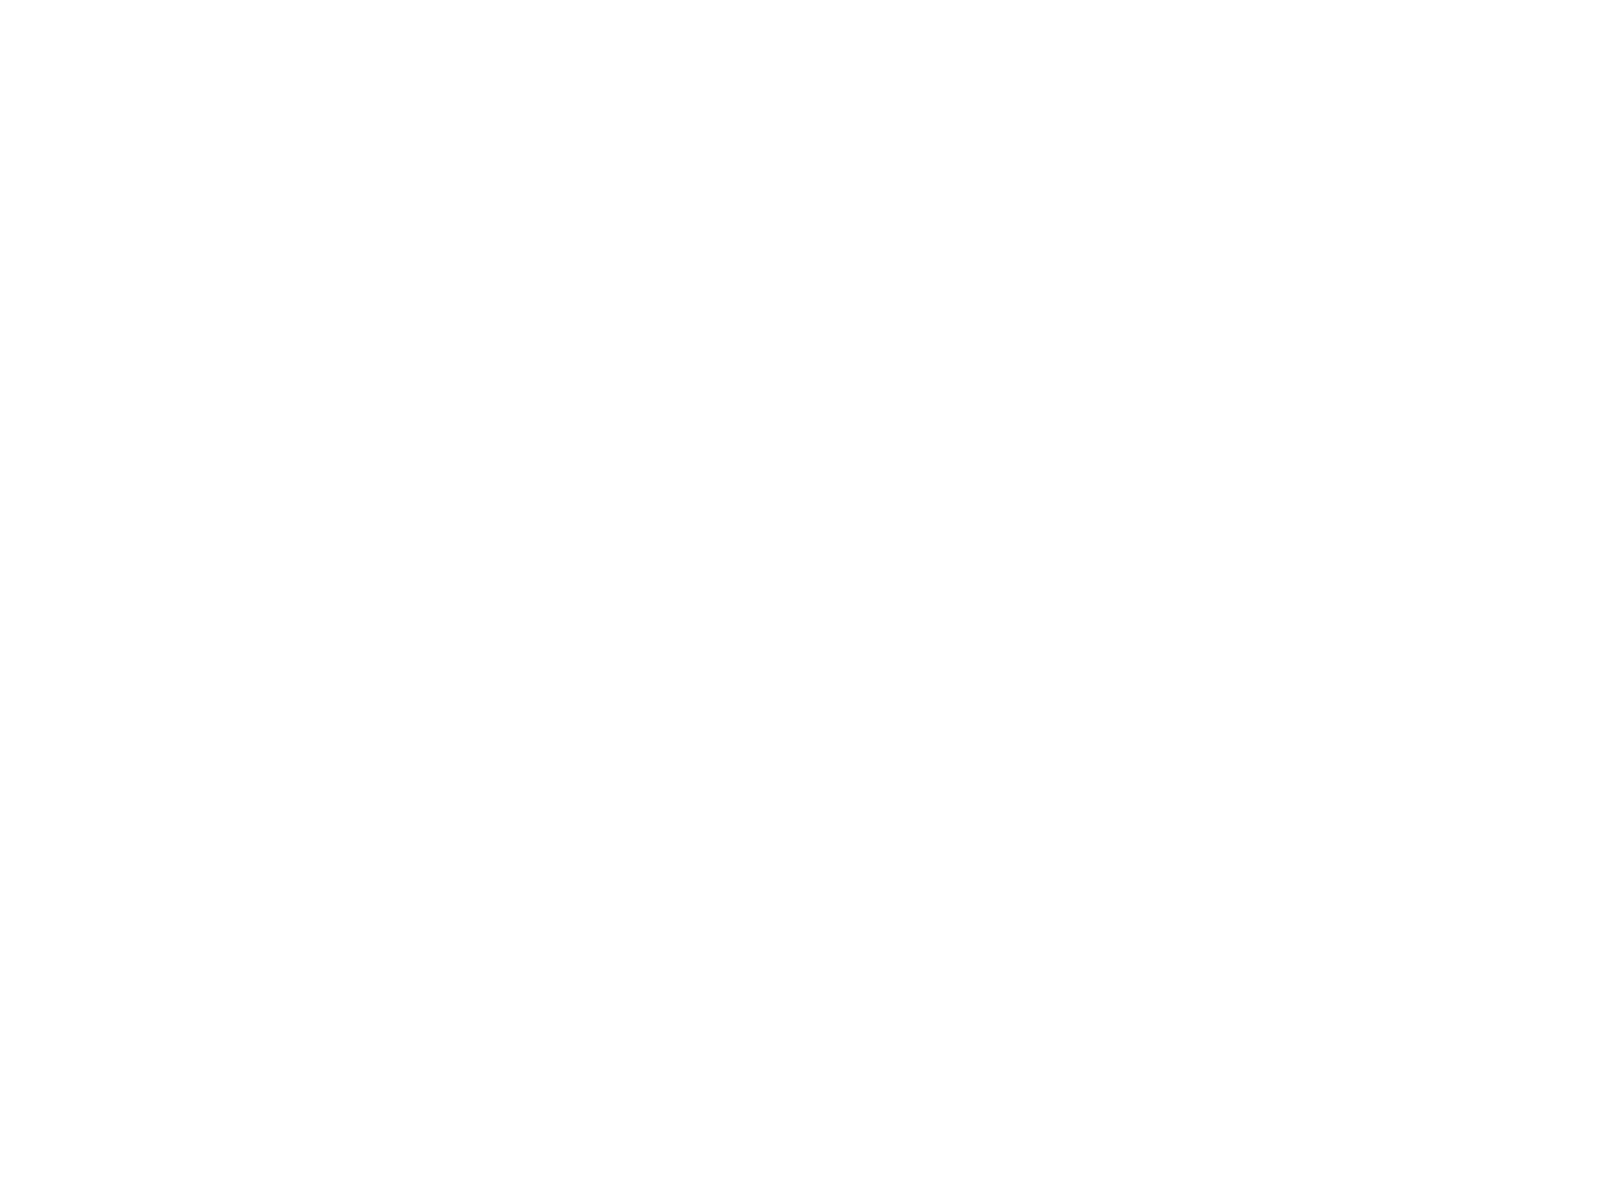

<IPython.core.display.Javascript object>


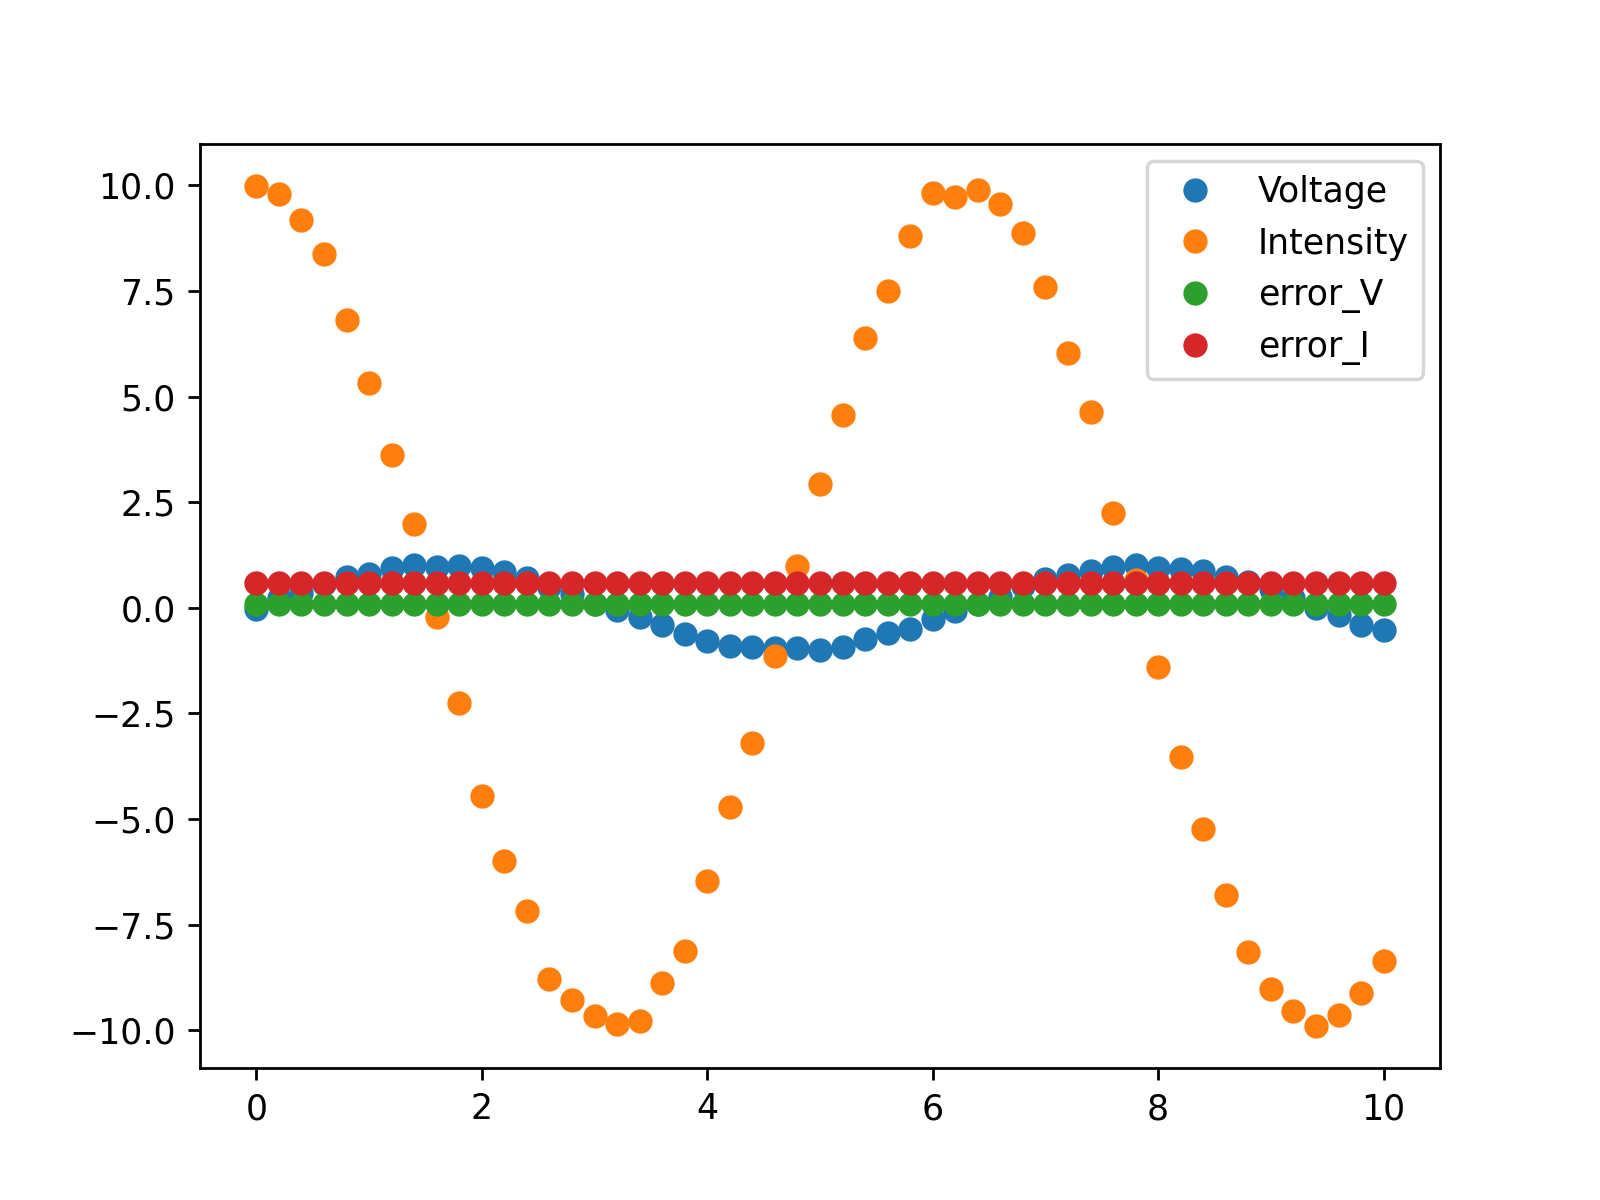

<AxesSubplot:>

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()    # create a new figure to draw in

data.plot(linestyle = '', marker='o')

## 2.2 `plot.ly`
`plot.ly` est une bibliothèque plus récente qui est plus axée sur l'interaction et produit des graphiques dans les pages Web (la sortie par défaut est au format HTML). Sa syntaxe est plus concise que celle de `matplotlib`, et il est en général plus facile à utiliser. L'inconvénient, c'est qu'il s'agit d'une bibliothèque encore jeune et qu'il manque peut-être encore quelques éléments.

Par défaut, `plot.ly` est utilisé en ligne, et les graphiques que vous produisez sont publics. Ici, nous allons configurer `plot.ly` pour que nous puissions travailler hors ligne. Il y a une ligne de code à ajouter pour accéder au mode en ligne, et il faut également  remplacer `plotly.plotly` par `plotly.offline` pour appeler la fonction de rendu `iplot()`. Les importations de modules nécessaires pour le travail de base avec plotly sont données ci-dessous.

In [ ]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode() # run at the start of every ipython notebook in order to start offline mode

Voici un court rappel sur le fonctionnment de `plot.ly`. Il faut fournir au moins les points à tracer, qui sont présentés sous forme d'un objet du module `plotly.graph_objs` :
- "Scatter" peut produire des graphiques avec des points, des lignes ou les deux, en réglant l'argument "mode" sur "markers", "lines" ou "markers+lines".
- "Surface" produit un tracé 3D de z(x,y) comme surface avec une carte de couleurs.
- "Bar" produit des diagrammes à barres.
- "Pie" produit des diagrammes circulaires, ....

Ces objets ont de nombreux attributs. 'x' et'y' correspondent aux données,'name au nom de la courbe,'error_y' aux propriétés des barres d'erreur y, etc....

Utilisez l'exemple ci-dessous pour tracer les données contenues dans les différents `DataFrames` que nous avons créés précédemment

In [ ]:
data2 = [ go.Scatter( x=data.index, y=data["Voltage"], mode="markers")]
py.iplot(data2)

# 3. Travailler avec de gros fichiers de données

Lorsque vous travaillez avec de gros fichiers de données, il peut arriver que le fichier ne puisse pas être ouvert car il est plus volumineux que la mémoire disponible sur la machine. Dans ce cas, une base de données est généralement utilisée. Le principe d'une base de données est d'avoir des données stockées sur un disque dur (localement ou à distance). Les données requises par l'utilisateur sont ensuite extraites de la base de données à l'aide de requêtes. De cette façon, seules de petites parties des données sont chargées dans la mémoire, et non le fichier entier.

Il est possible d'utiliser la base de données très efficacement avec python, mais cela nécessite la connaissance du langage SQL pour écrire les requêtes et comprendre comment l'information est stockée dans la base de données. Ici, nous proposons une autre façon de faire la même chose en utilisant une classe de `pandas` : `HDFStore`. Cette classe fonctionne à peu près de la même manière qu'une base de données, mais n'utilise pas la syntaxe QSL. L'objet `HDFStore` est utilisé pour stocker les données d'un ou plusieurs `pandas.DataFrames` sur le disque dur. Il utilise le format'HDF5', qui est très efficace pour stocker de grandes quantités de données dans un espace minimal. Un sous-ensemble de ces données peut être récupéré à l'aide de méthodes d'interrogation. Ces données extraites sont alors disponibles sous forme de `pandas.DataFrames` vivant en mémoire et peuvent être manipulées, tracées, etc... comme d'habitude.

Voici tout d'abord l'aide sur l'objet `HDFStore` :

In [ ]:
from pandas import HDFStore
help(HDFStore)

Pour créer un objet `HDFStore`, il suffit d'utiliser la fonction `HDFStore()` en spécifiant le nom du fichier sur disque et éventuellement le mode d'ouverture.

On peut avoir des informations sur la structure du fichier (les `DataFrames` contenues dans le fichier et leur éventuelle arborescence) grâce à la fonction `info()`

Pensez à fermer le `HDFStore` après utilisation pour que d'autres processus puissent éventuellement avoir accès au fichier => fonction `close()` 

In [ ]:
import pandas as pd
from pandas import HDFStore

store = pd.HDFStore('store.h5')   # creation du fichier 
store['df1'] = data               # ajout d'un 1er DataFrame
store['redr/df2'] = redr         # ajout d'un 2nd DataFrame
store['redr/df3'] = red_v        # ajout d'un 3eme DataFrame 

print(store.info())    # affichage des informations

store.close()  # fermeture du descripteur

Le code ci-dessous présente un exemple de création, remplissage puis extraction de données. Nous utilisons un petit fichier de données, qui ne nécessiterait normalement pas l'utilisation d'un `HDFStore`. Pour ce premier exemple, nous lisons l'ensemble des données contenues dans le fichier `HDFStore`. Nous verrons plus tard comment extraire une partie des données seulement.

In [ ]:
# Stockage
store = pd.HDFStore('store.h5', mode='w')   # creation du fichier (si le fichier existe déjà il est écrasé)
store['multimetre'] = data        # ajout d'un DataFrame nommé 'multimetre' au fichier
    
# Récupération des données
a_tracer = store['multimetre']
print(store.info())
print('--------------')

store.close() # fermeture du fichier

# Tracé
data3 = [ go.Scatter( x=a_tracer.index, y=a_tracer["Voltage"], mode="markers")]
py.iplot(data3)

Dans l'exemple précédent, nous avons inséré une `DataFrame` dans l'objet `HDFStore` à l'aide de l'opérateur []. Cette opération a pour effet d'écrire les données dans le fichier auquel l'objet `HDFStore` est lié.

Il existe une autre méthode pour ajouter des données : `HDFStore.put()`. Cette méthode est plus flexible que l'opérateur [] comme nous allons le montrer après. Essayons dans un premier temps d'ajouter d'autres `DataFrame`s à notre fichier 'store.h5' :

In [ ]:
store = pd.HDFStore('store.h5')   # ouverture du fichier (mode append par défaut)
multi = store['multimetre']
print(multi.tail())
print('-----------')

store['redresse'] = redr
store.put('red_v', red_v)
print(store.info())

store.close()

A présent, nous désirons extraire des données d'une `DataFrame` stockée dans un fichier `HDFStore`. Pour ce faire, on utilise la méthode `select()`

In [ ]:
store = pd.HDFStore('store.h5')

temps = list(range(10))
sel = store.select('multimetre', 'index=temps')

store.close()

Cela ne fonctionne pas car la table est en mode 'Fixed'. Pour résumer, deux types de format peuvent être utiliser pour écrire les tables du fichier HDF :
- Format 'fixed' : écriture et lecture rapide. Par contre, on ne peut pas ajouter de données aux `DataFrame`s stockées ni effectuer de recherches.
- Format 'table' : Structure de données moins permormante mais plus flexible, qui permet entre autre les opérations de recherche et sélection de sous-ensembles des données.

Par défaut, les `DataFrames` sont ajoutées en mode 'fixed'. Pour changer de mode, on peut modifier le comportement général de `pandas` à l'aide de la ligne suivante :

pd.set_option('io.hdf.default_format','table')

Sinon, l'insertion des `DataFrame`s à l'aide de la fonction `put()` permet de spécifier le type de format au cas par cas. C'est cette seconde méthode que nous allons mettre en oeuvre.

In [ ]:
store = pd.HDFStore('store.h5')
store.put('multimetre2', data, format='table')

temps = list(range(11))
sel = store.select('multimetre2', 'index=temps')
print(sel.tail())

store.close()

Pour finir, reprenez les différents points vus précédemment pour créer un fichier de données assez volumineux (quelques centaines de Mo), puis extrayez une partie des données du fichier pour les représenter graphiquement.

In [ ]:
# a vous de jouer !